In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import string

In [24]:
def sax(ts, size):
    """
    provide pandas series as input 
    """
    assert len(ts) % size == 0, f"cannot split provided time series of length {len(ts)} in {size} equal parts"
    assert size <= len(string.ascii_lowercase), "alphabet exhausted"
    paa_ts = []
    sax_ts = []
    ts = list(ts)
    alphabet = list(string.ascii_lowercase)
    ratio = size / len(ts)
    for ts_i in range(1, size + 1):
        char = alphabet.pop(0)
        for _ in range(int(len(ts) / size)):
            paa_ts.append(ratio * sum([ts[i] for i in _range_for_frame(ts_i, ts, size)]))
            sax_ts.append(char)
    return sax_ts, paa_ts

In [25]:
def _range_for_frame(i, ts, size):
    start = int(len(ts) / size * (i - 1) + 1)
    end = int(len(ts) / size * i)
    return range(start - 1, end)

In [83]:
path_to_csv = "shampoo.csv"

In [84]:
pd.read_csv(path_to_csv).columns

Index(['Month', 'Sales'], dtype='object')

In [85]:
col_name = "Sales"

In [86]:
print("Possible numbers of frames:")
for i in range(1, 27):
    if len(pd.read_csv(path_to_csv)) % i == 0:
        print(i)

Possible numbers of frames:
1
2
3
4
6
9
12
18


In [115]:
number_frames = 9

In [116]:
univar_ts = pd.read_csv(path_to_csv)[[col_name]]

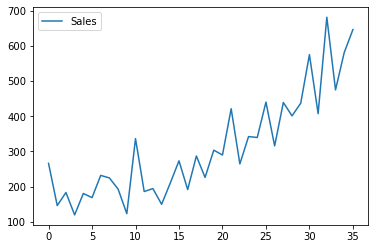

In [117]:
univar_ts.plot()

In [118]:
univar_ts = univar_ts.sort_values(col_name)

sax_col, paa_col = sax(univar_ts[col_name], number_frames)

In [120]:
len(sax_col)

36

In [121]:
univar_ts["sax"] = sax_col
univar_ts["paa"] = paa_col

In [122]:
pd.DataFrame(set(list(zip(sax_col, paa_col)))).sort_values(1)

,0,1
0,a,134.400
5,b,179.450
6,c,197.150
4,d,236.700
7,e,279.050
1,f,323.925
2,g,393.200
8,h,448.100
3,i,621.425


In [123]:
univar_ts = univar_ts.sort_index()

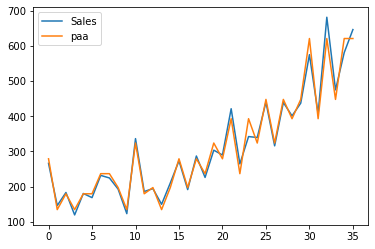

In [124]:
univar_ts.plot()

In [125]:
result_sax = ""
for i in univar_ts.sax:
    result_sax += i

In [126]:
result_sax

'eababbddcafbcacecedfegdgfhfhghigihii'

In [127]:
frequencies = {}
for i in set(sax_col):
    frequencies[i] = sax_col.count(i)

In [128]:
frequencies

{'g': 4, 'a': 4, 'f': 4, 'h': 4, 'i': 4, 'e': 4, 'd': 4, 'b': 4, 'c': 4}